<a href="https://colab.research.google.com/github/spriha211/hangman/blob/main/Recommender1_Student_MS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="#d3d3d3"><h1><b>Reminder to make a copy of this notebook, please do not directly edit!</b></h1></font>

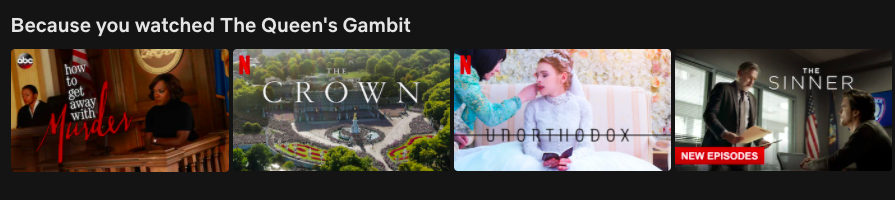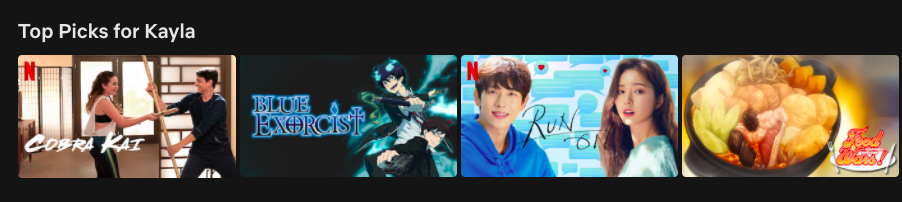

This week, we'll be delving right into the projects. You and your group are going to build an AI tool that can help recommend new content based on reviews and similar content. We'll start by understanding our problem, identifying:
* What are recommender systems? How are they used?
* What are some different types of recommender systems?
* What kind of data is used to implement one?

Once we have all of this information, we will take a step back and plan our system design.



In this notebook we will be:
1.   Learning how and why we use recommender systems
2.   Understanding and visualizing our data
3.   Understanding how to use movie data to find top movies



In [3]:
#@title Run this to download data and prepare our environment! { display-mode: "form" }

# importing packages and dataset
import gdown
import ast
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from IPython import display

movie_data_url = 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Pioneers/Recommender%20System/movie_dataset.csv'
movie_data_path = './movie_data.csv'
gdown.download(movie_data_url, movie_data_path, True)
movie_data = pd.read_csv(movie_data_path)
movie_data = movie_data.drop(columns=['homepage', 'id', 'popularity', 'status'])
movie_data.reset_index(drop=True, inplace=True)  # Reset the index

class Error(Exception):
    """Base class for other exceptions"""
    pass

class NotSeparableError(Error):
    """Raised when the input value is too small"""
    pass

def separate_values(column):
    if column not in {"genres", "keywords", "production_companies", "production_countries", "spoken_languages", "cast", "crew"}:
        raise NotSeparableError("This column is not separable.")
    mdata = movie_data.copy()
    if mdata[column][0][0] == '[':
        mdata[column] = mdata.apply(lambda row: [x['name'] for x in ast.literal_eval(row[column])], axis=1)
    else:
        mdata[column] = mdata[column].str.split()

    mdata = mdata.explode(column).reset_index()
    # mdata = mdata.drop_duplicates()  # Drop duplicate rows after exploding; this does not work
    # mdata = mdata[~mdata.index.duplicated()] # This works

    return mdata

def find_title_from_index(index):
    return movie_data[movie_data.index == index]["title"].values[0]
def find_index_from_title(title):
    return movie_data[movie_data.title == title]["index"].values[0]


# Milestone 1. What are recommender systems and why do we use them?

There are three main types of recommender systems that we'll be looking at in this project.
1. **Popular Recommendations**: Recommending things that are known to be popular or well rated
2. **Content Based Filtering**: Recommending things based on a similar item you bought or looked at
3. **Collaborative Filtering**: Recommending things based on what similar people have bought or looked at

## Exercise (Discussion)

* **What are some of the potential benefits or drawbacks to each of the three methods mentioned above?**

* **When might it be a good idea to use one method instead of another?**

## Exercise (Matching)

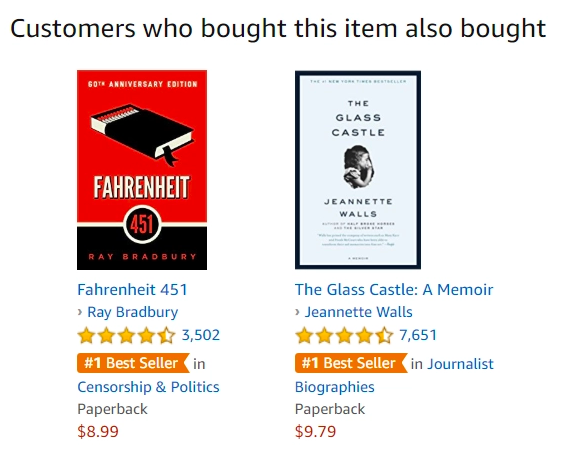


In [18]:
#@title What is this an example of? { display-mode: "form" }

Example  = "fill in" #@param ["Popular Recommendations", "Collaborative Filtering", "Content Based Filtering","fill in"]

if Example == "Collaborative Filtering":
  print("Yes! This is an example of collaborative filtering.")
else:
  print("Try again!")


Try again!


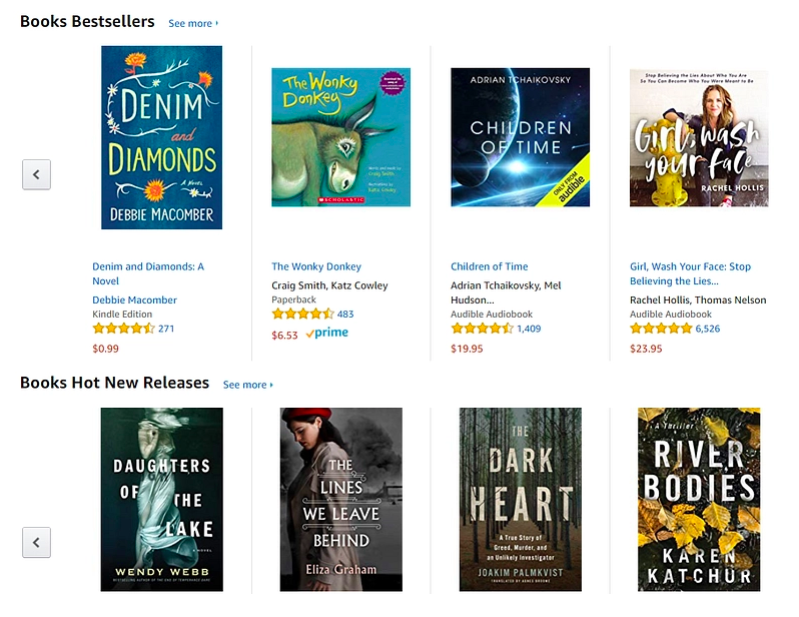

In [19]:
#@title What is this an example of? { display-mode: "form" }

Example  = "fill in" #@param ["Popular Recommendations", "Collaborative Filtering", "Content Based Filtering","fill in"]

if Example == "Popular Recommendations":
  print("Yes! This is an example of using popular recommendations.")
else:
  print("Try again!")

Try again!


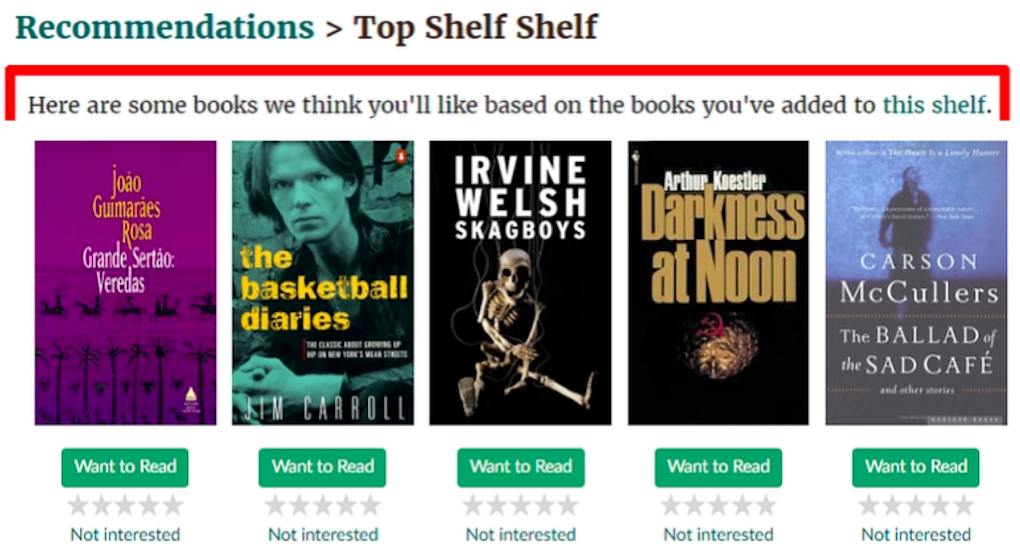

In [20]:
#@title What is this an example of? { display-mode: "form" }

Example  = "fill in" #@param ["Popular Recommendations", "Collaborative Filtering", "Content Based Filtering","fill in"]

if Example == "Content Based Filtering":
  print("Yes! This is an example of using content based filtering.")
else:
  print("Try again!")

Try again!


## Exercise (Discussion)


carousels.png

In [21]:
#@title Which of these categories are examples of recommender systems? { display-mode: "form" }

Recently_Added = False #@param {type:"boolean"}
Watch_It_Again = False #@param {type:"boolean"}
New_Releases = False #@param {type:"boolean"}
TV_Programmes = False #@param {type:"boolean"}
Action_Thrillers = False #@param {type:"boolean"}
Because_you_watched_Kill_Bill_Vol_1 = True #@param {type:"boolean"}
Because_you_watched_The_Fighter = True #@param {type:"boolean"}
Because_you_watched_Its_Such_a_Beautiful_Day = True #@param {type:"boolean"}
Because_you_watched_National_Treasure_Book_of_Secrets = True #@param {type:"boolean"}

responses = [Recently_Added, Watch_It_Again, New_Releases, TV_Programmes, Action_Thrillers, Because_you_watched_Kill_Bill_Vol_1, Because_you_watched_The_Fighter, Because_you_watched_Its_Such_a_Beautiful_Day, Because_you_watched_National_Treasure_Book_of_Secrets]

if all(response == True for response in responses):
  print("Yes! These are all examples of recommender systems.")
else:
  print("Try again!")

Try again!


In [22]:
#@title Which of these categories are using machine learning? { display-mode: "form" }

Recently_Added = False #@param {type:"boolean"}
Watch_It_Again = False #@param {type:"boolean"}
New_Releases = False #@param {type:"boolean"}
TV_Programmes = False #@param {type:"boolean"}
Action_Thrillers = False #@param {type:"boolean"}
Because_you_watched_Kill_Bill_Vol_1 = True #@param {type:"boolean"}
Because_you_watched_The_Fighter = True #@param {type:"boolean"}
Because_you_watched_Its_Such_a_Beautiful_Day = True #@param {type:"boolean"}
Because_you_watched_National_Treasure_Book_of_Secrets = True #@param {type:"boolean"}

responses = [Recently_Added, Watch_It_Again, New_Releases, TV_Programmes, Action_Thrillers, Because_you_watched_Kill_Bill_Vol_1, Because_you_watched_The_Fighter, Because_you_watched_Its_Such_a_Beautiful_Day, Because_you_watched_National_Treasure_Book_of_Secrets]

if all(response == True for response in responses):
  print("Yes! These are all examples of machine learning.")
else:
  print("Try again!")

Try again!


## Exercise (Discussion)
* **Why are recommender systems useful? You've already seen some examples of how they are used, but why do you think they are so widely used?**
* **What are some more potential applications of recommender systems?**

# Milestone 2. Understanding our data



## Exercise (Discussion)
Run the cell below this to the top five entries in our dataset. **What are some things you notice? What columns (features) do you think might be useful?**

In [4]:
movie_data.head(5) # prints out the first five entries in the dataset

index     budget                                    genres  \
0      0  237000000  Action Adventure Fantasy Science Fiction   
1      1  300000000                  Adventure Fantasy Action   
2      2  245000000                    Action Adventure Crime   
3      3  250000000               Action Crime Drama Thriller   
4      4  260000000          Action Adventure Science Fiction   

                                            keywords original_language  \
0  culture clash future space war space colony so...                en   
1  ocean drug abuse exotic island east india trad...                en   
2         spy based on novel secret agent sequel mi6                en   
3  dc comics crime fighter terrorist secret ident...                en   
4  based on novel mars medallion space travel pri...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...   
1    169.0           [{"iso_639_1": "en", "name": "English"}]   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...   
3    165.0           [{"iso_639_1": "en", "name": "English"}]   
4    132.0           [{"iso_639_1": "en", "name": "English"}]   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  \
0                                    Avatar           7.2       11800   
1  Pirates of the Caribbean: At World's End           6.9        4500   
2                                   Spectre           6.3        4466   
3                     The Dark Knight Rises           7.6        9106   
4                               John Carter           6.1        2124   

                                                cast  \
0  Sam Worthington Zoe Saldana Sigourney Weaver S...   
1  Johnny Depp Orlando Bloom Keira Knightley Stel...   
2  Daniel Craig Christoph Waltz L\u00e9a Seydoux ...   
3  Christian Bale Michael Caine Gary Oldman Anne ...   
4  Taylor Kitsch Lynn Collins Samantha Morton Wil...   

                                                crew           director  
0  [{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...      James Cameron  
1  [{'name': 'Dariusz Wolski', 'gender': 2, 'depa...     Gore Verbinski  
2  [{'name': 'T

Try printing out a specific column of the data. We can do this by using the format shown in the cell below. Try changing the name of the column to print out some others.

In [5]:
movie_data['genres'].head(5)

0    Action Adventure Fantasy Science Fiction
1                    Adventure Fantasy Action
2                      Action Adventure Crime
3                 Action Crime Drama Thriller
4            Action Adventure Science Fiction
Name: genres, dtype: object

If you want to print out multiple columns, you can do it like the example shown below! Try changing the columns printed to print some other ones.

In [6]:
movie_data[['original_title', 'vote_average', 'vote_count']].head(5)

original_title  vote_average  vote_count
0                                    Avatar           7.2       11800
1  Pirates of the Caribbean: At World's End           6.9        4500
2                                   Spectre           6.3        4466
3                     The Dark Knight Rises           7.6        9106
4                               John Carter           6.1        2124

## Exercise (Discussion)
We can print out the size of our movie dataset using the shape function. Run the cell below to see what the size of the dataset is. What do each of these numbers mean?

In [7]:
# Print out the size of movie_data
print(movie_data.shape)

(4803, 20)


In [9]:
#@title What does each number in the movie_data shape represent? { display-mode: "form" }

#@markdown What does the bold number (**4803**, 20) represent?
Dimension_0  = "number of movies" #@param ["number of movies", "number of genres", "number of features", "types of movies","fill in"]

#@markdown What does the bold number (4803, **20**) represent?
Dimension_1  = "number of features" #@param ["number of movies", "number of genres", "number of features", "types of movies","fill in"]

if Dimension_0 == 'number of movies':
  print("Yes! Dimension_0 is the number of movies in the dataset")
else:
  print("Try again for Dimension_0!")

if Dimension_1 == 'number of features':
  print("Yes! Dimension_1 is the number of features in the dataset.")
else:
  print("Try again for Dimension_1!")

Yes! Dimension_0 is the number of movies in the dataset
Yes! Dimension_1 is the number of features in the dataset.


### Exercise (Optional)

**How many unique genres are in the dataset?**

Since a movie can have more than one genre, we can use a special function written called `separate_values` to help parse it. If a column has multiple values in each entry (like the `genres` column or the `production_companies` columns for example, we have to use this special function.

Try printing out the result of using `separate_values` on the `genres` column to see what's going on. Remember, we can print out the first few rows of a pandas data set using the `head` function.

In [16]:
movie_data['genres'].unique()


array(['Action Adventure Fantasy Science Fiction',
       'Adventure Fantasy Action', 'Action Adventure Crime', ...,
       'Thriller Horror Comedy', 'Foreign Thriller',
       'Comedy Drama Romance TV Movie'], dtype=object)

**What's changed about the data?**

Now that we see how `separate_values` works, we can use it to find unique values with the `value_counts` function! Here's an example below.

In [18]:
item_counts = separate_values("genres")["genres"].value_counts()
print(item_counts)

genres
Drama          2297
Comedy         1722
Thriller       1259
Action         1153
Romance         890
Adventure       790
Crime           696
Fiction         530
Science         530
Horror          519
Family          510
Fantasy         418
Mystery         347
Animation       234
History         197
Music           183
War             142
Documentary     110
Western          80
Foreign          34
TV                8
Movie             8
Name: count, dtype: int64


We can use this format for finding the unique values for any feature that has multiple values in each entry (ie for `genres`, `keywords`, `production_companies`, `production_countries`, `spoken_languages`, `cast`, and `crew`).

Use the `value_counts` function and the `separate_values` function in the cell below to find the unique values for some of these other categories!

In [17]:
# YOUR CODE HERE
item_counts = separate_values("genres")["genres"].value_counts()
print(item_counts)

genres
Drama          2297
Comedy         1722
Thriller       1259
Action         1153
Romance         890
Adventure       790
Crime           696
Fiction         530
Science         530
Horror          519
Family          510
Fantasy         418
Mystery         347
Animation       234
History         197
Music           183
War             142
Documentary     110
Western          80
Foreign          34
TV                8
Movie             8
Name: count, dtype: int64


## Activity: Plotting

### Exercise (Discussion)
**What do you think has the biggest factor in the average rating of a movie?**

We have a ton of different data, so let's use it to try to figure out what contributes to the average rating of a movie. We have some columns that use numerical data and some that use other data, like names of people, languages, and other things. Because of this, we'll need to plot in two different ways.

For the **numerical data**, we'll use a scatter plot and for **other data types** we'll use a categorical plot. Similar to before, some of our features will also need to use the `separate_values` function to split up the columns into usable chunks.



### Exercise (Coding)
Here's a few examples for how to make the different plots:

**Scatter Plot:**
```
sns.scatterplot(x="vote_average", y=COLUMN YOU'RE PLOTTING AGAINST, data=movie_data)
```
**Categorical Plot:**
```
sns.catplot(x="vote_average", y=COLUMN YOU'RE PLOTTING AGAINST, data=movie_data)
```

If you need to use the `separate_values` function, you use it in place of `movie_data` like this:
```
sns.catplot(x="vote_average", y=COLUMN YOU'RE PLOTTING AGAINST, data=separate_values(COLUMN YOU'RE PLOTTING AGAINST))
```

**Check which parts you'll need to plot each column below and run the cell to see if you got it right! Then plot that column.**

#### Plotting `genres`

In [24]:
#@title What do you need to plot "genres"?  { display-mode: "form" }

scatterplot = False #@param {type:"boolean"}
catplot = True #@param {type:"boolean"}
separate_values_ = True #@param {type:"boolean"}

if catplot and separate_values_ and not scatterplot:
  print("Correct!")
else:
  print("Try again!")

Try again!


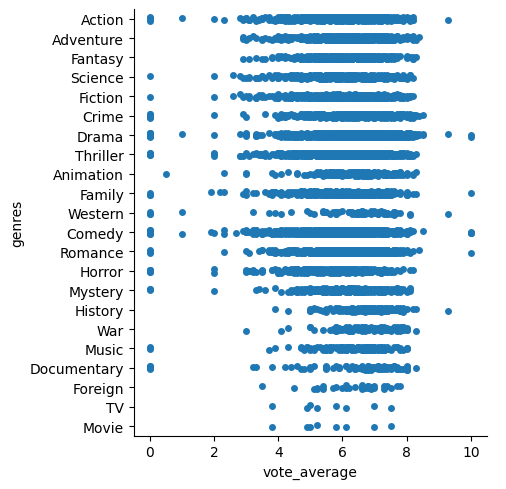

In [27]:
sns.catplot(x="vote_average", y= "genres", data=separate_values("genres"))


#### Plotting `budget`

In [28]:
#@title What do you need to plot "budget"?  { display-mode: "form" }

scatterplot = True #@param {type:"boolean"}
catplot = False #@param {type:"boolean"}
separate_values_ = False #@param {type:"boolean"}

if scatterplot and not catplot and not separate_values_:
  print("Correct!")
else:
  print("Try again!")

Correct!


In [42]:
sns.violinplot(x='budget', y=separate_values("genres"), data=movie_data)

ValueError: Length of DataFrame vectors must match length of `data` when both are used, but `data` has length 4803 and the vector passed to `y` has length 12685.

#### Plotting `vote_count`

In [38]:
#@title What do you need to plot "vote_count"?  { display-mode: "form" }

scatterplot = True #@param {type:"boolean"}
catplot = False #@param {type:"boolean"}
separate_values_ = False #@param {type:"boolean"}

if not catplot and scatterplot and not separate_values_:
  print("Correct!")
else:
  print("Try again!")

Correct!


In [39]:
sns.scatterplot(x="vote_average", y='vote_count', data=movie_data)

<Axes: xlabel='vote_average', ylabel='vote_count'>

#### Other plots (Optional)
Use the code cell below to plot any columns we haven't plotted yet that you want to see!

### Exercise (Discussion)
**You might have noticed in some of the plots that there are some really high or low outliers in the data. Where do you think those might be coming from?**


# Milestone 3. Recommending Movies Based on Rating
a68b17be-6311-4d99-a120-68d66b13162c.jpg

One simple way that we can recommend movies to users is by just recommending the most popular movies! What we're going to do is build up a list of the top rated movies to give to our user as recommendations.


## Activity: How do we judge movies with our data?


### Exercise (Discussion)
We want to look at the data sorted by rating, so that the top rated movies are at the top of the data set when we print it out.

To sort a data set by the value of a column, we can use the pandas `sort_values()` function! Here's an example of how to use it below for the `runtime` column to print out the movies with the 10 longest runtimes.


In [45]:
runtime_sorted_movies = movie_data.sort_values('runtime', ascending=False)
runtime_sorted_movies.head(10)

index    budget                        genres  \
2384   2384  18000000  Crime Drama Thriller History   
2631   2631         0                         Drama   
1922   1922         0             War Drama History   
1125   1125  31115000         Drama History Romance   
2373   2373         0                         Drama   
3510   3510         0          Romance Comedy Drama   
3813   3813   4000000             Drama Romance War   
1663   1663  30000000                   Drama Crime   
4497   4497    600000     History Documentary Music   
1109   1109  44000000  Action Drama History Western   

                                               keywords original_language  \
2384             gun car bomb miniseries terrorism opec                en   
2631                                         miniseries                en   
1922          civil war independence troops army battle                en   
1125  ancient rome historical figure cleopatra juliu...                en   
2373   mother shakespeare denmark loss of father prince                en   
3510                                                NaN                en   
3813  life and death civil war southern usa loss of ...                en   
1663  life and death corruption street gang rape sad...                en   
4497           hippie free love musical music woodstock                en   
1109             montana showdown brothel marshal dance                en   

                   original_title  \
2384                       Carlos   
2631                  The Company   
1922                   Gettysburg   
1125                    Cleopatra   
2373                       Hamlet   
3510                         Emma   
3813           Gone with the Wind   
1663  Once Upon a Time in America   
4497                    Woodstock   
1109                Heaven's Gate   

                                               overview  \
2384  The story of Venezuelan revolutionary, Ilich R...   
2631  Real-life figures from the Cold War era mix wi...   
1922  Summer 1863. The Confederacy pushes north into...   
1125  Historical epic. The triumphs and tragedy of t...   
2373  Hamlet, Prince of Denmark, returns home to fin...   
3510  Emma Woodhouse seems to be perfectly content, ...   
3813  An American classic in which a manipulative wo...   
1663  A former Prohibition-era Jewish gangster retur...   
4497  An intimate look at the Woodstock Music & Art ...   
1109  Harvard graduate James Averill (Kris Kristoffe...   

                                   production_companies  \
2384  [{"name": "Egoli Tossell Film AG", "id": 2254}...   
2631                                                 []   
1922  [{"name": "TriStar Television", "id": 8609}, {...   
1125  [{"name": "Twentieth Century Fox Film Corporat...   
2373  [{"name": "Castle Rock Entertainment", "id": 9...   
3510                                                 []   
3813  [{"name": "Selznick International Pictures", "...   
1663  [{"name": "Warner Bros.", "id": 6194}, {"name"...   
4497  [{"name": "Wadleigh-Maurice", "id": 3816}, {"n...   
1109  [{"name": "United Artists", "id": 60}, {"name"...   

                                   production_countries release_date  \
2384  [{"iso_3166_1": "FR", "name": "France"}, {"iso...   2010-05-19   
2631                                                 []   2007-08-05   
1922  [{"iso_3166_1": "US", "name": "United States o...   1993-10-08   
1125  [{"iso_3166_1": "GB", "name": "United Kingdom"...   1963-06-12   
2373  [{"iso_3166_1": "GB", "name": "United Kingdom"...   1996-12-25   
3510                                                 []   2009-10-11   
3813  [{"iso_3166_1": "US", "name": "United States o...   1939-12-15   
1663  [{"iso_3166_1": "US", "name": "United States o...   1984-02-16   
4497  [{"iso_3166_1": "US", "name": "United States o...   1970-03-26   
1109  [{"iso_3166_1": "US", "name": "United States o...   1980-11-19   

        revenue  runtime                           

Now we can use that same function to print out the top 10 movies based on their `vote_average`! Print those out using the code cell below.

In [47]:
runtime_sorted_movies = movie_data.sort_values('vote_average', ascending=False)
runtime_sorted_movies.head(5)

index  budget                genres  \
3519   3519       0                Comedy   
4247   4247       1  Romance Comedy Drama   
4045   4045       0   Comedy Drama Family   
4662   4662       0                Comedy   
3992   3992       0                   NaN   

                                 keywords original_language  \
3519  italy victorian england young woman                en   
4247                                  NaN                en   
4045                     small town texas                en   
4662                     independent film                en   
3992                                  NaN                en   

             original_title  \
3519       Stiff Upper Lips   
4247  Me You and Five Bucks   
4045  Dancer, Texas Pop. 81   
4662         Little Big Top   
3992              Sardaarji   

                                               overview  \
3519  Stiff Upper Lips is a broad parody of British ...   
4247  A womanizing yet lovable loser, Charlie, a wai...   
4045  Four guys, best friends, have grown up togethe...   
4662  An aging out of work clown returns to his smal...   
3992  A ghost hunter uses bottles to capture trouble...   

                                   production_companies  \
3519                                                 []   
4247                                                 []   
4045  [{"name": "HSX Films", "id": 4714}, {"name": "...   
4662          [{"name": "Fly High Films", "id": 24248}]   
3992                                                 []   

                                   production_countries release_date  revenue  \
3519  [{"iso_3166_1": "GB", "name": "United Kingdom"...   1998-06-12        0   
4247                                                 []   2015-07-07        0   
4045  [{"iso_3166_1": "US", "name": "United States o...   1998-05-01   565592   
4662  [{"iso_3166_1": "US", "name": "United States o...   2006-01-01        0   
3992            [{"iso_3166_1": "IN", "name": "India"}]   2015-06-26        0   

      runtime                          spoken_languages  \
3519     99.0  [{"iso_639_1": "en", "name": "English"}]   
4247     90.0                                        []   
4045     97.0  [{"iso_639_1": "en", "name": "English"}]   
4662      0.0  [{"iso_639_1": "en", "name": "English"}]   
3992      0.0                                        []   

                                           tagline                  title  \
3519                                           NaN       Stiff Upper Lips   
4247          A story about second, second chances  Me You and Five Bucks   
4045  in the middle of nowhere they had everything  Dancer, Texas Pop. 81   
4662                                           NaN         Little Big Top   
3992                                           NaN              Sardaarji   

      vote_average  vote_count  \
3519          10.0           1   
4247          10.0           2   
4045          10.0           1   
4662          10.0           1   
3992           9.5           2   

                                                   cast  \
3519  Georgina Cates Peter Ustinov Prunella Scales S...   
4247                                                NaN   
4045  Breckin Meyer Peter Facinelli Eddie Mills Etha...   
4662  Sid Haig Richard Riehle Mel England Jacob Zach...   
3992                                                NaN   

                                                   crew       director  
3519  [{'name': 'Jeremy Bolt', 'gender': 0, 'departm...    Gary Sinyor  
4247                                                 []            NaN  
4045  [{'name': 'Tim McCanlies', 'gender': 2, 'depar...  Tim McCanlies  
4662                                                 []            NaN  
3992  [{'name': 'Rohit Jugraj', 'gender': 0, 'depart...   Rohit Jugraj

### Exercise (Discussion)

**Is the `vote_average` a good judge for a top-rated movie? Why or why not?**

**How can we use the data we have to rank movies?**
* What if we just use the rating?
* What are potential problems with this?
* Do you recognize any of the movies that are printed out above?

### Exercise (Optional)

Try sorting the data by other columns! What do you see?

In [50]:
runtime_sorted_movies = movie_data.sort_values('vote_count', ascending=False)
runtime_sorted_movies.head(5)

index     budget                                             genres  \
96      96  160000000  Action Thriller Science Fiction Mystery Adventure   
65      65  185000000                        Drama Action Crime Thriller   
0        0  237000000           Action Adventure Fantasy Science Fiction   
16      16  220000000                   Science Fiction Action Adventure   
788    788   58000000                            Action Adventure Comedy   

                                              keywords original_language  \
96   loss of lover dream kidnapping sleep subconsci...                en   
65   dc comics crime fighter secret identity scarec...                en   
0    culture clash future space war space colony so...                en   
16   new york shield marvel comic superhero based o...                en   
788  anti hero mercenary marvel comic superhero bas...                en   

      original_title                                           overview  \
96         Inception  Cobb, a skilled thief who commits corporate es...   
65   The Dark Knight  Batman raises the stakes in his war on crime. ...   
0             Avatar  In the 22nd century, a paraplegic Marine is di...   
16      The Avengers  When an unexpected enemy emerges and threatens...   
788         Deadpool  Deadpool tells the origin story of former Spec...   

                                  production_companies  \
96   [{"name": "Legendary Pictures", "id": 923}, {"...   
65   [{"name": "DC Comics", "id": 429}, {"name": "L...   
0    [{"name": "Ingenious Film Partners", "id": 289...   
16   [{"name": "Paramount Pictures", "id": 4}, {"na...   
788  [{"name": "Twentieth Century Fox Film Corporat...   

                                  production_countries release_date  \
96   [{"iso_3166_1": "GB", "name": "United Kingdom"...   2010-07-14   
65   [{"iso_3166_1": "GB", "name": "United Kingdom"...   2008-07-16   
0    [{"iso_3166_1": "US", "name": "United States o...   2009-12-10   
16   [{"iso_3166_1": "US", "name": "United States o...   2012-04-25   
788  [{"iso_3166_1": "US", "name": "United States o...   2016-02-09   

        revenue  runtime                                   spoken_languages  \
96    825532764    148.0  [{"iso_639_1": "en", "name": "English"}, {"iso...   
65   1004558444    152.0  [{"iso_639_1": "en", "name": "English"}, {"iso...   
0    2787965087    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...   
16   1519557910    143.0           [{"iso_639_1": "en", "name": "English"}]   
788   783112979    108.0           [{"iso_639_1": "en", "name": "English"}]   

                                     tagline            title  vote_average  \
96      Your mind is the scene of the crime.        Inception           8.1   
65                           Why So Serious?  The Dark Knight           8.2   
0                Enter the World of Pandora.           Avatar           7.2   
16                   Some assembly required.     The Avengers           7.4   
788  Witness the beginning of a happy ending         Deadpool           7.4   

     vote_count                                               cast  \
96        13752  Leonardo DiCaprio Joseph Gordon-Levitt Ellen P...   
65        12002  Christian Bale Heath Ledger Aaron Eckhart Mich...   
0         11800  Sam Worthington Zoe Saldana Sigourney Weaver S...   
16        11776  Robert Downey Jr. Chris Evans Mark Ruffalo Chr...   
788       10995  Ryan Reynolds Morena Baccarin Ed Skrein T.J. M...   

                                                  crew           director  
96   [{'name': 'Hans Zimmer', 'gender': 2, 'departm...  Christopher Nolan  
65   [{'name': 'Lucinda Syson', 'gender': 1, 'depar...  Christopher Nolan  
0    [{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...      James Cameron  
16   [{'name': 'Alan Silvestri', 'gender': 2, 'depa...        Joss Whedon  
788  [{'name': 'Ronna Kress', 'gender': 1, 'departm...         Tim Miller

### Exercise (Discussion)

We've defined a function for you that calculates a weighted rating for a movie. It's used like this:


```
rating = weighted_rating(data, minimum_votes, mean_vote)
```
* `data` is the data being used
* `miminum_votes` is the minimum votes required for us to care about it
* `mean_average_vote` is the mean average vote across the whole dataset. We use this to see how far the `vote_average` for a movie is from the average vote across all the movies in the data set.

Fill in the variable values below to calculate each of these values (`miminum_votes` you can choose!), then we'll use those to calculate the weighted rating for each movie in a new feature called "score".





Let's first choose the `minimum_votes` value!

**What do you think is a good `minimum_votes` value?**

### Exercise (Coding)

In [57]:
minimum_votes = 200

Now let's find the `mean_average_value`. To calculate the mean value of a column, we can use the pandas `mean()` function! Here's an example of how to use it below for the `runtime` column:

In [55]:
mean_runtime = movie_data['vote_average'].mean()
print(mean_runtime)

6.092171559442016


Try printing out the `mean_runtime` above to see if the number makes sense to you.

Now, go ahead and fill in the values below for `mean_average_vote`!

In [59]:
mean_average_vote = 6 # YOUR CODE HERE

In [61]:
#@title Run this to use the weighted rating function! { display-mode: "form" }

def weighted_rating(x, m=minimum_votes, C=mean_average_vote):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

### Exercise (Coding)
Now if you run the cell below, you can see we add a new `score` feature that we can use in our data! Add a line to the code cell below to print out the top five rows of the `movie_data` and find the `score` column.

In [64]:
movie_data['score'] = movie_data.apply(weighted_rating, axis=1)
movie_data.head(5)

index     budget                                    genres  \
0      0  237000000  Action Adventure Fantasy Science Fiction   
1      1  300000000                  Adventure Fantasy Action   
2      2  245000000                    Action Adventure Crime   
3      3  250000000               Action Crime Drama Thriller   
4      4  260000000          Action Adventure Science Fiction   

                                            keywords original_language  \
0  culture clash future space war space colony so...                en   
1  ocean drug abuse exotic island east india trad...                en   
2         spy based on novel secret agent sequel mi6                en   
3  dc comics crime fighter terrorist secret ident...                en   
4  based on novel mars medallion space travel pri...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date  ...  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  ...   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19  ...   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26  ...   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  ...   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07  ...   

   runtime                                   spoken_languages  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...   
1    169.0           [{"iso_639_1": "en", "name": "English"}]   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...   
3    165.0           [{"iso_639_1": "en", "name": "English"}]   
4    132.0           [{"iso_639_1": "en", "name": "English"}]   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title vote_average  vote_count  \
0                                    Avatar          7.2       11800   
1  Pirates of the Caribbean: At World's End          6.9        4500   
2                                   Spectre          6.3        4466   
3                     The Dark Knight Rises          7.6        9106   
4                               John Carter          6.1        2124   

                                                cast  \
0  Sam Worthington Zoe Saldana Sigourney Weaver S...   
1  Johnny Depp Orlando Bloom Keira Knightley Stel...   
2  Daniel Craig Christoph Waltz L\u00e9a Seydoux ...   
3  Christian Bale Michael Caine Gary Oldman Anne ...   
4  Taylor Kitsch Lynn Collins Samantha Morton Wil...   

                                                crew           director  \
0  [{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...      James Cameron   
1  [{'name': 'Dariusz Wolski', 'gender': 2, 'depa...     Gore Verbinski   
2  [{'name': 'Thomas Newman', 'gender': 2, 'depar...        

### Exercise (Discussion)
* What does the weighted rating show?
* Does the weighted rating make sense?
* Any discoveries about the score?

## Exercise (Coding)
Remember earlier when we were plotting the `vote_average` against other values in our data set and getting some interesting outliers? Let's try plotting some of those values against `score` instead. **What do you see?**

In [68]:
sns.scatterplot(x="vote_average", y='score', data=movie_data)

<Axes: xlabel='vote_average', ylabel='score'>

## Activity: Find the top movies!

### Exercise (Coding)
Using our newly changed dataset with the score feature, fill in this function to return the top 10 movies and their scores!

We can use the `sort_values` function we used above to do this! Then, we can use some of the methods we used above to get certain columns in the data set and return those.

In [81]:
def most_popular_movies(data, num_movies):
  # YOUR CODE HERE: paste in your values for minimum_votes and mean_average_vote
  minimum_votes = 200
  mean_average_vote = 6

  # adding in the score column
  data['score'] = data.apply(weighted_rating, axis=1)

  # sorting data set
  sorted_data = data.sort_values('score', ascending=False)

  # YOUR CODE HERE: return the top num_movies movies and their scores
  return sorted_data[['original_title', 'score']].head(num_movies)

print(most_popular_movies(movie_data, 10))

                original_title     score
1881  The Shawshank Redemption  8.440512
3337             The Godfather  8.321221
662                 Fight Club  8.252148
3232              Pulp Fiction  8.246685
1818          Schindler's List  8.198432
3865                  Whiplash  8.196722
2294                  千と千尋の神隠し  8.186139
2731    The Godfather: Part II  8.169983
65             The Dark Knight  8.163940
809               Forrest Gump  8.145859


### Exercise (Discussion)
* What are the limitations to using this approach for movie recommendations?
* Is the best/top rated movie one of your favorite movies?

### Challenge Exercise (Coding)
Try writing your own scoring function! What would be a good way to score different movies? Once you've made your function, replace `weighted_rating` with the name of your function in this line of code in the `most_popular_movies` function:


```
  movie_data['score'] = movie_data.apply(weighted_rating, axis=1)
```



In [87]:
#@title Instructor Sample Solution
import pandas as pd
from datetime import datetime

def my_scoring_function(row, data):
    # Extract relevant data from the row
    vote_count = row['vote_count']
    release_date = row['release_date']

    # Calculate the current date
    current_date = datetime.now()

    # Define weights for popularity and recency
    popularity_weight = 0.7
    recency_weight = 0.3

    # Calculate the maximum and minimum values for vote count and recency
    max_vote_count = data['vote_count'].max()
    min_vote_count = data['vote_count'].min()
    max_recency = (current_date - pd.to_datetime(data['release_date'])).max().days
    min_recency = (current_date - pd.to_datetime(data['release_date'])).min().days

    # Normalize the vote count and recency values
    normalized_vote_count = (vote_count - min_vote_count) / (max_vote_count - min_vote_count)
    normalized_recency = 1 - ((current_date - pd.to_datetime(release_date)).days - min_recency) / (max_recency - min_recency)

    # Calculate the score based on vote count and recency
    score = popularity_weight * normalized_vote_count + recency_weight * normalized_recency

    return score


movie_data['score'] = movie_data.apply(my_scoring_function, args=(movie_data,), axis=1)
print(my_scoring_function(10, movie_data))

TypeError: 'int' object is not subscriptable

Once you've made a new function, try running the `most_popular_movies` function again. How did the scores change? Were you recommended different movies?

### Now, in the next notebook, we're going to implement two more approaches for making recommendations!